# CIFAR10 Classifier

In [199]:
import torch
import torchvision
import torchvision.transforms as transforms

## Prepare Data

In [200]:
valid_ratio = 0.3
batch_size = 128
transform = transforms.Compose([transforms.ToTensor()])

cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

num_train = int((1.0 - valid_ratio) * len(cifar_train))
num_valid = int(valid_ratio * len(cifar_train))

train_set, valid_set = torch.utils.data.dataset.random_split(cifar_train, [num_train, num_valid])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size, shuffle=True)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Boat', 'Truck')



Files already downloaded and verified


# Visualize Dataset


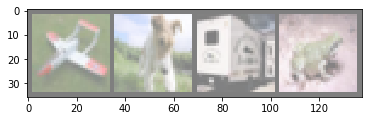

Airplane   Dog Truck  Frog


In [201]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get iterater for loaded training images
dataiter = iter(train_loader)

# get the next batch of images and labels
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4,]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define CNN

In [231]:
import torch.nn as nn 
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # self.fc1 = nn.Linear(16 * 6 * 6, 128) # Flatten output of previous layer
        # self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # block 1
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
  
        # # layer 4
        # # reshape by multiplying dimensions of x after previous layer
        # x = x.view(-1, 16 * 6 * 6) 
        # x = self.fc1(x)
        # x = F.relu(x)

        # # layer 5
        # x = self.fc2(x)
        # x = F.softmax(x)

        # return x


## Visualize Network

In [232]:
from torchsummary import summary
from torchvision import models

model = Network()

summary(model, (3, 32, 32))

AttributeError: 'Network' object has no attribute 'conv3'

## Training Loop

In [209]:
def get_num_correct(predictions, labels):
  return predictions.argmax(dim=1).eq(labels).sum().item()

In [210]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

lr = 0.001
network = Network()
optimizer = optim.Adam(network.parameters(), lr=lr) # parameters are weights and baises

train_loss = []
valid_loss = []
for epoch in range(20):
    train_correct = 0
    batch_loss = []
    for batch in train_loader:
        images, labels = batch

        predictions = network(images)
        loss = F.cross_entropy(predictions, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.item())
        train_correct += get_num_correct(predictions, labels)
    
    train_loss.append(sum(batch_loss)/len(batch_loss))
    with torch.no_grad():
        batch_loss = []
        valid_correct = 0
        for batch in valid_loader:
            images, labels = batch

            predictions = network(images)
            loss = F.cross_entropy(predictions, labels)
            batch_loss.append(loss.item())
            valid_correct += get_num_correct(predictions, labels)
        
        valid_loss.append(sum(batch_loss)/len(batch_loss))
    
    print(f"epoch: {epoch} \t train loss: {train_loss[-1]: .3f} \t train accuracy: {train_correct/len(train_set): .3f} \t valid loss: {valid_loss[-1]: .3f} \t valid accuracy: {valid_correct/len(valid_set):.3f}")






RuntimeError: Given groups=1, weight of size 8 3 3 3, expected input[128, 8, 32, 32] to have 3 channels, but got 8 channels instead

## Training Visualization

In [0]:
plt.plot(train_loss, label="Train Loss")
plt.plot(valid_loss, label="Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Prepare Testing Data















In [0]:
# transform = transforms.Compose([transforms.ToTensor()])

cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=True)

## Calculate Testing Accuracy

In [0]:
total_correct = 0
for batch in test_loader:
    images, labels = batch
    predictions = network(images)
    total_correct += predictions.argmax(dim=1).eq(labels).sum().item()

print(f"Test accuracy: {total_correct/len(cifar_test)}")